# Tema de trabajo: Identificación de los patrones de comportamiento de las organizaciones Sociales fortalecidas por la dependencia.
## Descripción:

Las organizaciones de la sociedad civil y las diversas redes sociales, han sido parte esencial para la gestión social y política de la ciudad, con el aporte de ellas, se han construido y mantenido diversos espacios de participación y desarrollo, hoy se cuenta con una política pública orientada a la construcción colectiva de herramientas para promover el desarrollo, fortalecimiento, acompañamiento, sostenibilidad y la gestión. 

La subsecretaría de organización Social ha venido implementando una herramienta para caracterizar las  organizaciones de la sociedad civil con el proposito de tener información que le permita avanzar en una toma de decisiones basada en información, posibilitando adelantar acciones que aporten a una gestión mas efectiva desde la secretaría y a la implementación de la política pública que tiene la ciudad en este campo. 

## Necesidad: 
Definir cuales son los aspectos en los cuales la entidad debe centrar su trabajo y en cuales organizaciones sociales, por lo tanto se requiere que dicha información posibilite clasificar aspectos de las organizaciones que requieren ser fortalecidos y las acciones mas pertinentes según tipo de organización.

## Descripción del problema:

La secretaría no fortalece las organizaciones sociales basado en las caracteristicas y necesidades de estas.

## Antecendentes:
La dependencia en especial el equipo de la subsecretaría ha generado en el cuatrienio diferentes accciones con el fin de intervenir a las organizaciones en asuntos de interes para mejorar su funcionamiento y gestión a largo plazo. Por esta razón durante los años 2017 y 2019 se aplicó una ficha de caracterización a diferentes organizaciones, que maneja una ponderación que los ubica en un nivel.
## personas o dependencias interesadas en el posible proyecto:

La Secretaría de Participación Ciudadana, El Comité de política pública de Organización Social y las Organizaciones Sociales con las que interactua la dependencia.

## Insumos: Fichas de caracterización de Organizaciones sociales.
### Descripción del insumo:
La ficha de caracterización de organizaciones y colectivos cuenta con 63 preguntas base y 9 preguntas condicionales que sólo se responden en función de preguntas anteriores. A partir de las concertaciones con el equipo interesado, 23 preguntas son las que se recogen en este indicador. Finalmente este resultado a nivel general, por componentes y subcomponentes se estandariza en tres estados: Alto (66-100), Medio (32-65) y Bajo (0-31), los estados se determinan cuando los componentes arrojen la media ponderada, que es la medida de tendencia central usada para precisar que tan alejados están los resultados por comuna y organización alrededor de la media.
La ficha indaga los siguientes componentes:
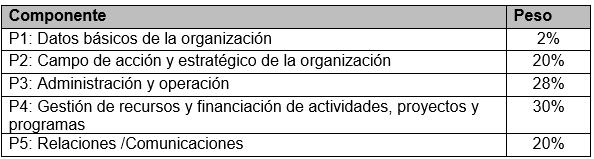

## Descripción del problema en términos de la analítica:

Desconocimiento de Factores que inciden en el estado de las organización.

## Modelos:
Tecnica de clasificación a utilizar K-Means.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mainpath = "/Users/USUARIO/Documents/05 de Diciembre de 2017/05 de Diciembre Noche/Jasmin MP/Jasmin 2019/ORSO/Python"
filename = "OrganizacionesSociales2017-20197.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath)

In [4]:
data.shape

(660, 228)

In [5]:
data.columns.values

array(['Ficha', 'Arco', 'Fecha', 'Zona', 'Comuna', 'Organización ',
       'Percepcion', 'Dirección', 'Representante', 'Tipo Organismo',
       'Estado de Seguimiento', 'Se encuentra avalada por institución',
       'Cuales?1', 'sector ambiental', 'sector educación',
       'sector deporte', 'sector recreación', 'sector social',
       'sector solidario', 'sector economico_productivo',
       'sector cultural', 'sector salud', 'sector infraestructura',
       'sector vivienda', 'sector derechos_humanos', 'sector agricola',
       'sector artistico', 'sector comunicaciones', 'sector género',
       'Suma Sector', 'sector otro', 'otro_cual',
       'objeto social: población_indigena',
       'objeto social: población_afrodescendiente_negra_palenquera_o_raizal',
       'objeto social: población_rom_o_gitana', 'Emite certificaciones',
       'áreas temáticas agricola1', 'áreas temáticas ambiental',
       'áreas temáticas artistica',
       'áreas temáticas bienes_sociales_y_publicos',
   

In [6]:
data.dtypes

Ficha                                   float64
Arco                                    float64
Fecha                                    object
Zona                                     object
Comuna                                   object
Organización                             object
Percepcion                              float64
Dirección                                object
Representante                            object
Tipo Organismo                           object
Estado de Seguimiento                    object
Se encuentra avalada por institución      int64
Cuales?1                                 object
sector ambiental                          int64
sector educación                          int64
sector deporte                            int64
sector recreación                         int64
sector social                             int64
sector solidario                          int64
sector economico_productivo               int64
sector cultural                         

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Distribución de los resultados de las fichas de caracterización de las Organizaciones de la sociedad civil')

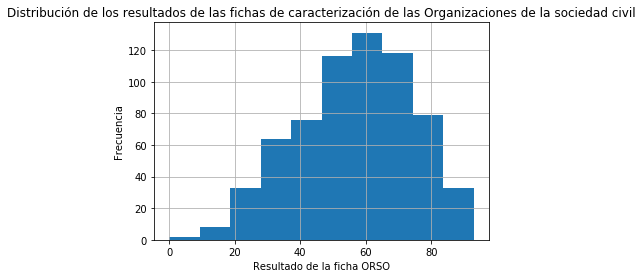

In [8]:
data['Total General'].hist()
plt.xlabel("Resultado de la ficha ORSO")
plt.ylabel("Frecuencia")
plt.title("Distribución de los resultados de las fichas de caracterización de las Organizaciones de la sociedad civil")

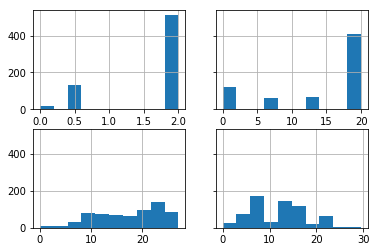

In [9]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=False)
data["% Datos basicos de la Organización "].hist(ax=axs[0][0])# Formalización
data["%Campo de Acción y estratégico de la Organización"].hist(ax=axs[0][1])# Definición estratégica
data["% Administración y Operación"].hist(ax=axs[1][0])# Dinámica operativa
data['% Gestión de recursos y financiación de actividades, proyectos y programas.'].hist(ax=axs[1][1]);# Manejo de recursos


In [10]:
dataCopia2 = data.copy()

In [11]:
dataCopia2.columns.values

array(['Ficha', 'Arco', 'Fecha', 'Zona', 'Comuna', 'Organización ',
       'Percepcion', 'Dirección', 'Representante', 'Tipo Organismo',
       'Estado de Seguimiento', 'Se encuentra avalada por institución',
       'Cuales?1', 'sector ambiental', 'sector educación',
       'sector deporte', 'sector recreación', 'sector social',
       'sector solidario', 'sector economico_productivo',
       'sector cultural', 'sector salud', 'sector infraestructura',
       'sector vivienda', 'sector derechos_humanos', 'sector agricola',
       'sector artistico', 'sector comunicaciones', 'sector género',
       'Suma Sector', 'sector otro', 'otro_cual',
       'objeto social: población_indigena',
       'objeto social: población_afrodescendiente_negra_palenquera_o_raizal',
       'objeto social: población_rom_o_gitana', 'Emite certificaciones',
       'áreas temáticas agricola1', 'áreas temáticas ambiental',
       'áreas temáticas artistica',
       'áreas temáticas bienes_sociales_y_publicos',
   

In [12]:
dataCopia2.drop(['Ficha', 'Arco', 'Fecha', 'Zona', 'Percepcion', 'Dirección', 'Representante', 'Tipo Organismo',
       'Estado de Seguimiento','Cuales?1','sector otro', 'otro_cual','áreas temáticas otro_cual', 'txtotrocual', 'Fortalezas',
       'Organizaciones Primer Nivel', 'Cuales?3',
       'Organizaciones Segundo Nivel', 'Organizaciones conforman',
       'n° radicado', 'Registro en otra entidad', 'n° radicado.1',
       'Nombre de la entidad','N° RADICADO','La sede es:','Actividades',
       'Tipo de productos','grupos poblacionales: otros_grupos_poblacionales',
       'otros_grupos_poblaiconales', 'Enuncie la misión',
       'Enuncie la visión','Enuncie los Objetivos','Miembros de la Organización', 'Fecha Actualización',
       'Denominación del Organo de Dirección',
       'Miembros del organo de dirección',
       'Forma de elección', 'cada cuanto se reune el organo de dirección',
       'cada cuanto se reune los socios',
       'Cuantas personas vinculadas',
       'Tiempo está formulado', 'Porcentaje del plan estratégico',
       'Cuales?4','Cuales?5','Cuales?6', 'Cuales?7',
       
       'Dispone de recursos otros', 'Presupuesto Anual',
       
       'Año, duración y valor del proyecto1', 
       'Año, duración y valor del proyecto2',
       'Año, duración y valor del proyecto3', 
       'Cuales?8', 'Cuales?9', 'Cuales?10',
       'txtOTRAS_CUALES_RECONOCIMIENTO', 'Cuanto y cuando fue la última',
       'Acciones realiza',
       'Principales  necesidades','sector ambiental', 'sector educación', 'sector deporte',
       'sector recreación', 'sector social', 'sector solidario',
       'sector economico_productivo', 'sector cultural', 'sector salud',
       'sector infraestructura', 'sector vivienda',
       'sector derechos_humanos', 'sector agricola', 'sector artistico',
       'sector comunicaciones', 'sector género','objeto social: población_indigena',
       'objeto social: población_afrodescendiente_negra_palenquera_o_raizal',
       'objeto social: población_rom_o_gitana','áreas temáticas agricola1', 'áreas temáticas ambiental',
       'áreas temáticas artistica',
       'áreas temáticas bienes_sociales_y_publicos',
       'áreas temáticas ciencia', 'áreas temáticas construcción',
       'áreas temáticas democracia', 'áreas temáticas deportivo',
       'áreas temáticas derechos_humanos1',
       'áreas temáticas desarrollo_económico',
       'áreas temáticas desarrollo_juvenil',
       'áreas temáticas desarrollo_rural',
       'áreas temáticas desarrollo_social_y_participacion',
       'áreas temáticas económica', 'áreas temáticas educación1',
       'áreas temáticas empleo', 'áreas temáticas empresarial',
       'áreas temáticas género', 'áreas temáticas gobernanza',
       'áreas temáticas humanidades', 'áreas temáticas investigación',
       'áreas temáticas juvenil',
       'áreas temáticas medios_de_comunicación',
       'áreas temáticas planeación',
       'áreas temáticas producción_científica',
       'áreas temáticas recreacion', 'áreas temáticas redes',
       'áreas temáticas salud1', 'áreas temáticas seguridad',
       'áreas temáticas social1', 'áreas temáticas social_familia',
       'áreas temáticas social_niñez', 'áreas temáticas cultural1',
       'áreas temáticas solidario1', 'áreas temáticas sostenibilidad',
       'áreas temáticas servicios_sociales', 'áreas temáticas vivienda1',
       'áreas temáticas voluntariado', 'áreas temáticas innovación',
       'áreas temáticas tecnología',
       'áreas temáticas acueducto-alcantarillado',
       'áreas temáticas socio_ambiental', 'áreas temáticas sociocultural',
       'áreas temáticas medio ambiente','% Datos basicos de la Organización ',
       'grupos poblacionales: hombres', 'grupos poblacionales: mujeres',
       'grupos poblacionales: población_lgbti',
       'grupos poblacionales: niños', 'grupos poblacionales: niñas',
       'grupos poblacionales: jovenes', 'grupos poblacionales: adultos',
       'grupos poblacionales: adultos_mayores',
       'grupos poblacionales: afrodescendientes',
       'grupos poblacionales: indigenas',
       'grupos poblacionales: población_en_situación_de_discapacidad',
       'grupos poblacionales: habitante_de_calle',
       'grupos poblacionales: victimas_del_conflicto',
       'grupos poblacionales: campesinos',
       'grupos poblacionales: rom_o_gitana','%Campo de Acción y estratégico de la Organización', '% Administración y Operación',
'Total','Total.1','Total.2','Total.3','Total.4','Total.5','Total.6','Total.7','Total.8','Total.9','Total.10','Total.11',
'Total.12','Total.13', 'Total.14','Total.15','Total.16','% Gestión de recursos y financiación de actividades, proyectos y programas.',
'Total.17','Total.18','Total.19','Total.20','Total.21','Total.22','Relaciones/Comunicaciones','Personas Vinculadas', 'Cobertura municipio','Escala territorial','Medio'],axis='columns', inplace=True)

In [13]:
dataCopia2.dtypes

Comuna                                                                                                             object
Organización                                                                                                       object
Se encuentra avalada por institución                                                                                int64
Suma Sector                                                                                                         int64
Emite certificaciones                                                                                               int64
Suma Areas temáticas                                                                                                int64
Tiene Estatutos                                                                                                     int64
Registro en Cámara de comercio                                                                                      int64
Certificado de gobernaci

In [14]:
dataCopia2.columns.values

array(['Comuna', 'Organización ', 'Se encuentra avalada por institución',
       'Suma Sector', 'Emite certificaciones', 'Suma Areas temáticas',
       'Tiene Estatutos', 'Registro en Cámara de comercio',
       'Certificado de gobernación', 'Tiene sede',
       'Suma Grupos poblacionales', 'Misión', 'Visión', 'Objetivos',
       'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       

In [15]:
dataCopia2.shape

(660, 60)

In [16]:
dataCopia2

,Comuna,Organización,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,Registro en Cámara de comercio,Certificado de gobernación,Tiene sede,...,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social,Total General,Nivel,Año
0,9 - Buenos Aires,LINCES,0,4,0,7,0,0,0,0,...,1,0,0,1,0,0,0,32.290,Medio,2019
1,2 - Santa Cruz,ACCIÓN PARTICIPATIVA CIUDADANA,0,10,0,15,1,0,0,1,...,1,0,0,4,0,1,1,87.130,Alto,2017
2,10 - LA CANDELARIA,ACIMCOL,1,3,0,3,1,1,1,1,...,0,0,0,1,0,0,1,71.560,Alto,2019
3,6 - Doce de octubre,AFRAMERINDIA COLECTIVO DE AUDIOVISUALES,0,5,0,8,0,0,0,0,...,0,0,0,1,0,0,0,47.540,Medio,2019
4,4 - Aranjuez,AFROPARME,0,1,0,29,1,1,1,1,...,1,0,0,8,0,1,0,50.430,Medio,2017
5,11 - Laureles—Estadio,AGENCIA SOCIAL POR EL BIENESTAR MENTAL ASOBIME,0,1,0,4,1,1,0,0,...,1,0,0,3,0,0,0,33.185,Medio,2017
6,11 - Laureles—Estadio,AGRUPACIÓN TUNAS REMEMBRANZAS,0,1,0,3,1,0,0,1,...,1,0,0,2,0,0,0,60.700,Medio,2019
7,10 - LA CANDELARIA,AICOLD (ASOCIACIÓN INTERCULTURAL COLOMBIA DIVE...,1,6,1,3,1,1,0,1,...,1,0,1,3,0,1,0,66.830,Alto,2019
8,8 - Villa Hermosa,ALIMENTARTE AFRICAN CULTURE,0,3,0,6,0,0,0,0,...,1,0,0,3,0,0,0,43.880,Medio,2017
9,70 - Altavista,ALTAVISTA CUENTA SU HISTORIA Y SU MEMORIA,0,5,0,5,1,0,0,1,...,1,0,0,3,0,0,0,47.130,Medio,2019


In [17]:
dataCopia2.columns.values

array(['Comuna', 'Organización ', 'Se encuentra avalada por institución',
       'Suma Sector', 'Emite certificaciones', 'Suma Areas temáticas',
       'Tiene Estatutos', 'Registro en Cámara de comercio',
       'Certificado de gobernación', 'Tiene sede',
       'Suma Grupos poblacionales', 'Misión', 'Visión', 'Objetivos',
       'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       

In [18]:
dataCopia3 = dataCopia2[['Comuna', 'Organización ','Total General', 'Nivel', 'Se encuentra avalada por institución',
       'Suma Sector', 'Emite certificaciones', 'Suma Areas temáticas',
       'Tiene Estatutos', 'Registro en Cámara de comercio',
       'Certificado de gobernación', 'Tiene sede',
       'Suma Grupos poblacionales', 'Misión', 'Visión', 'Objetivos',
       'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de cooperación nacional',
       'Dispone de recursos recursos de cooperación internacional',
       'Dispone de recursos contratos con entidades públicas.',
       'Dispone de recursos campañas', 'Dispone de recursos eventos',
       'Recursos Propios', 'Proyectos con recursos propios',
       'Recursos Públicos', 'Recursos de Cooperación Internacional',
       'Manejo de registros de ingresos y gastos',
       'Existencia de Obligaciones tributarias',
       'Existencia de contador y revisor fiscal',
       'Relación con entidades privadas',
       'Relación con entidades públicas',
       'Ejecución de proyectos con otras entidades', 'MEDIOS: RADIO',
       'MEDIOS: CORREO ELECTRÓNICO', 'MEDIOS: TELEVISIÓN',
       'MEDIOS: PRENSA', 'MEDIOS: PERIODICOS_COMUNITARIOS',
       'MEDIOS: BLOGS', 'MEDIOS: PAGINAS_WEB', 'MEDIOS: FACEBOOK',
       'MEDIOS: YOUTUBE', 'MEDIOS: QQ', 'MEDIOS: WHATSAPPS',
       'MEDIOS: VOZ A VOZ', 'MEDIOS: INSTAGRAM', 'Suma Medios',
       'MEDIOS: TWITTER', 'Realiza rendición de cuentas',
       'Promover Control Social']]

In [19]:
##
## Se separa la información de las palabras relacionadas
## con los intereses del resto de la información
##
ORSO = dataCopia3.iloc[:,4:].copy()
ORSO.head()

,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,Registro en Cámara de comercio,Certificado de gobernación,Tiene sede,Suma Grupos poblacionales,Misión,...,MEDIOS: FACEBOOK,MEDIOS: YOUTUBE,MEDIOS: QQ,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social
0,0,4,0,7,0,0,0,0,9,0,...,0,0,0,1,0,0,1,0,0,0
1,0,10,0,15,1,0,0,1,14,1,...,1,0,0,1,0,0,4,0,1,1
2,1,3,0,3,1,1,1,1,15,1,...,0,0,0,0,0,0,1,0,0,1
3,0,5,0,8,0,0,0,0,11,1,...,1,0,0,0,0,0,1,0,0,0
4,0,1,0,29,1,1,1,1,14,0,...,1,1,0,1,0,0,8,0,1,0


<Figure size 5760x5760 with 0 Axes>

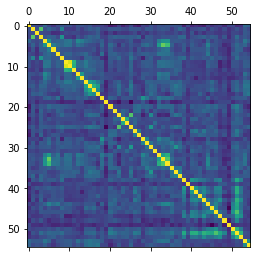

In [20]:
plt.figure(figsize=(80,80))
plt.matshow(ORSO.corr())

In [21]:
Descripción=ORSO.describe()
Descripción

,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,Registro en Cámara de comercio,Certificado de gobernación,Tiene sede,Suma Grupos poblacionales,Misión,...,MEDIOS: FACEBOOK,MEDIOS: YOUTUBE,MEDIOS: QQ,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.563636,3.790909,0.019697,8.175758,0.774242,0.481818,0.113636,0.543939,7.428788,0.725758,...,0.559091,0.165152,0.010606,0.480303,0.048485,0.172727,2.313636,0.063636,0.531818,0.365152
std,0.496310,2.880826,0.139062,7.799811,0.418397,0.500048,0.317610,0.498443,4.237926,0.446470,...,0.496873,0.371599,0.102516,0.499991,0.214951,0.378298,2.067186,0.244289,0.499365,0.481838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1.000000,5.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000
max,1.000000,14.000000,1.000000,42.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000


In [22]:
Correlacion=ORSO.corr()
Correlacion

,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,Registro en Cámara de comercio,Certificado de gobernación,Tiene sede,Suma Grupos poblacionales,Misión,...,MEDIOS: FACEBOOK,MEDIOS: YOUTUBE,MEDIOS: QQ,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social
Se encuentra avalada por institución,1.000000,0.079367,0.058763,0.037874,0.189864,0.047470,-0.031505,0.071489,0.103522,0.082302,...,-0.042962,0.004638,0.031451,-0.065264,0.056379,0.054518,-0.055720,-0.033451,0.196928,0.172365
Suma Sector,0.079367,1.000000,0.086052,0.681826,0.084155,0.174325,0.102297,0.035998,0.321566,0.010800,...,0.084973,0.037976,-0.018170,0.074042,-0.037515,0.020658,0.101487,0.021092,0.129101,0.059460
Emite certificaciones,0.058763,0.086052,1.000000,0.072350,0.050462,0.037891,-0.050754,-0.045343,0.003671,0.062694,...,0.038033,-0.004316,-0.014676,0.016501,-0.031997,0.050610,0.047100,0.007715,0.132998,0.096317
Suma Areas temáticas,0.037874,0.681826,0.072350,1.000000,0.107035,0.168117,0.151799,0.055387,0.415974,0.005583,...,0.145713,0.120857,0.001461,0.112174,-0.059396,0.058609,0.214636,0.071371,0.128686,0.079801
Tiene Estatutos,0.189864,0.084155,0.050462,0.107035,1.000000,0.411901,0.147670,0.167696,0.181335,0.244819,...,0.031420,0.103530,0.055908,0.011353,0.003784,0.054996,0.136378,0.081385,0.263213,0.153609
Registro en Cámara de comercio,0.047470,0.174325,0.037891,0.168117,0.411901,1.000000,0.294887,0.213252,0.189502,0.252906,...,0.117318,0.101931,0.048169,-0.065163,-0.034139,0.096844,0.200034,0.133708,0.187667,0.049640
Certificado de gobernación,-0.031505,0.102297,-0.050754,0.151799,0.147670,0.294887,1.000000,0.145740,0.111430,0.102390,...,0.058349,0.110747,0.009533,-0.009773,-0.080825,0.063722,0.179067,0.160906,0.010655,-0.023662
Tiene sede,0.071489,0.035998,-0.045343,0.055387,0.167696,0.213252,0.145740,1.000000,0.124324,0.173559,...,0.050771,0.112326,0.035411,-0.008700,-0.076567,0.136736,0.171431,0.076699,0.098015,0.049981
Suma Grupos poblacionales,0.103522,0.321566,0.003671,0.415974,0.181335,0.189502,0.111430,0.124324,1.000000,0.132818,...,0.195132,0.100465,0.115256,0.051615,-0.042846,0.065421,0.222967,0.109917,0.117233,0.103043
Misión,0.082302,0.010800,0.062694,0.005583,0.244819,0.252906,0.102390,0.173559,0.132818,1.000000,...,0.117623,0.090480,-0.102123,-0.000443,-0.082605,0.101197,0.096624,0.048948,0.144693,0.127620


In [23]:
ORSO.dtypes

Se encuentra avalada por institución                                                                              int64
Suma Sector                                                                                                       int64
Emite certificaciones                                                                                             int64
Suma Areas temáticas                                                                                              int64
Tiene Estatutos                                                                                                   int64
Registro en Cámara de comercio                                                                                    int64
Certificado de gobernación                                                                                        int64
Tiene sede                                                                                                        int64
Suma Grupos poblacionales               

In [24]:
#df = pd.DataFrame(Tiposvariables)
#df.to_csv("Tipos variables.csv", index=False, sep=";", decimal=",")

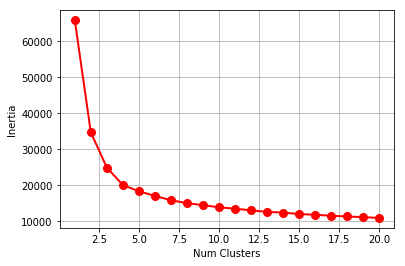

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

LOOPS = 20
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8

def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset:
    """
    #points = list()
    
    #with open(dir_dataset, 'r') as reader:
    #    for point in reader:
    #        points.append(np.asarray(map(float, point.split(","))))
    #return points
    points=list(dir_dataset.values)
    return points
    
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()
    
def select_clusters(dataset, loops, max_iterations, init_cluster, tolerance,
                    num_threads):
    # Read data set
    points = dataset_to_list_points(dataset)
    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=num_threads)

        # Calculate Kmeans
        
        kmeans.fit(points)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

if __name__ == '__main__':
    select_clusters(ORSO, LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,
                    CONVERGENCE_TOLERANCE, NUM_THREADS)



In [26]:
##
## Se escala para eliminar problemas asociados
## a la medida de los datos.
##
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ORSO_z = scaler.fit_transform(ORSO)
ORSO_z

array([[0.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.21428571, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14285714, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.07142857, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.21428571, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
##
## Se usa el algoritmo para determinar los centros de 5 grupos
##
from sklearn.cluster import KMeans
df_clusters = KMeans(n_clusters=5, random_state=1).fit(ORSO_z)

In [28]:
##
## Número de patrones asignados a cada cluster
##
(pd.DataFrame(df_clusters.predict(ORSO_z)))[0].value_counts()

0    179
2    138
3    121
1    113
4    109
Name: 0, dtype: int64

In [29]:
##
## Frecuencia de las palabras en cada cluster
##
df_clusters.cluster_centers_

array([[ 6.81564246e-01,  2.69353551e-01,  2.23463687e-02,
         1.67331737e-01,  9.55307263e-01,  8.77094972e-01,
         1.50837989e-01,  6.48044693e-01,  4.76350093e-01,
         9.55307263e-01,  9.38547486e-01,  8.21229050e-01,
         9.60893855e-01,  9.10614525e-01,  7.31843575e-01,
         4.41340782e-01,  3.63128492e-01,  4.46927374e-01,
         5.25139665e-01,  5.19553073e-01,  2.96089385e-01,
         2.45810056e-01,  4.46927374e-02, -3.64291930e-17,
         3.12250226e-17,  1.17318436e-01,  2.23463687e-02,
         1.11731844e-01,  7.70949721e-01,  4.18994413e-01,
         3.01675978e-01,  5.58659218e-02,  9.60893855e-01,
         8.49162011e-01,  8.93854749e-01,  3.74301676e-01,
         5.19553073e-01,  4.69273743e-01,  5.02793296e-02,
         2.79329609e-02,  8.37988827e-02,  4.46927374e-02,
         1.17318436e-01,  1.67597765e-02,  3.35195531e-01,
         5.19553073e-01,  7.82122905e-02,  4.16333634e-17,
         2.96089385e-01,  5.02793296e-02,  1.28491620e-0

In [30]:
##
## Se asigna a cada ejemplo de los datos
## el cluster al que pertenece
##
dataCopia3["cluster"] = df_clusters.predict(ORSO_z).tolist()
#dataCopia3["cluster"] = df_clusters.predict(ORSO_z).tolist()

In [31]:
dataCopia2.columns.values

array(['Comuna', 'Organización ', 'Se encuentra avalada por institución',
       'Suma Sector', 'Emite certificaciones', 'Suma Areas temáticas',
       'Tiene Estatutos', 'Registro en Cámara de comercio',
       'Certificado de gobernación', 'Tiene sede',
       'Suma Grupos poblacionales', 'Misión', 'Visión', 'Objetivos',
       'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       

In [32]:
##
##
## clusters a los que pertenecen los primeros cinco patrones
##

Revisión1= dataCopia3[['Comuna', 'Organización ','cluster','Total General', 'Nivel',  'Se encuentra avalada por institución',
       'Suma Sector', 'Emite certificaciones', 'Suma Areas temáticas',
       'Tiene Estatutos', 'Registro en Cámara de comercio',
       'Certificado de gobernación', 'Tiene sede',
       'Suma Grupos poblacionales', 'Misión', 'Visión', 'Objetivos',
       'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de cooperación nacional',
       'Dispone de recursos recursos de cooperación internacional',
       'Dispone de recursos contratos con entidades públicas.',
       'Dispone de recursos campañas', 'Dispone de recursos eventos',
       'Recursos Propios', 'Proyectos con recursos propios',
       'Recursos Públicos', 'Recursos de Cooperación Internacional',
       'Manejo de registros de ingresos y gastos',
       'Existencia de Obligaciones tributarias',
       'Existencia de contador y revisor fiscal',
       'Relación con entidades privadas',
       'Relación con entidades públicas',
       'Ejecución de proyectos con otras entidades', 'MEDIOS: RADIO',
       'MEDIOS: CORREO ELECTRÓNICO', 'MEDIOS: TELEVISIÓN',
       'MEDIOS: PRENSA', 'MEDIOS: PERIODICOS_COMUNITARIOS',
       'MEDIOS: BLOGS', 'MEDIOS: PAGINAS_WEB', 'MEDIOS: FACEBOOK',
       'MEDIOS: YOUTUBE', 'MEDIOS: QQ', 'MEDIOS: WHATSAPPS',
       'MEDIOS: VOZ A VOZ', 'MEDIOS: INSTAGRAM', 'Suma Medios',
       'MEDIOS: TWITTER', 'Realiza rendición de cuentas',
       'Promover Control Social']].head(660)

In [33]:
Revisión1[Revisión1['cluster'] == 0]


,Comuna,Organización,cluster,Total General,Nivel,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,...,MEDIOS: FACEBOOK,MEDIOS: YOUTUBE,MEDIOS: QQ,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social
2,10 - LA CANDELARIA,ACIMCOL,0,71.560,Alto,1,3,0,3,1,...,0,0,0,0,0,0,1,0,0,1
16,10 - LA CANDELARIA,ASOCIACION DE LUCHA CONTRA LA ESCLEROSIS MULT...,0,57.990,Medio,1,1,0,4,1,...,1,0,0,0,0,1,3,0,1,0
18,5 - Castilla,ASOCIACION ASIDO CON AMOR,0,51.840,Medio,1,3,0,6,1,...,0,0,0,0,0,0,1,0,1,0
20,4 - ARANJUEZ,ASOCIACIÒN CIVICA DE MUJERES SIN EMPLEO - REVIVIR,0,64.270,Medio,0,11,0,15,1,...,1,0,0,0,0,0,1,0,0,0
22,12 - La América,ASOCIACIÓN CLUB DE VIDA AÑOS FELICES,0,69.700,Alto,0,3,0,6,1,...,1,0,0,1,0,0,2,0,1,1
26,6 - Doce de octubre,ASOCIACIÓN CLUB DE VIDA NUEVO RENACER,0,57.200,Medio,1,5,0,5,1,...,1,0,0,0,0,0,1,0,1,1
27,9 - Buenos Aires,ASOCIACIÓN CLUB DE VIDA NUEVOS HORIZONTES,0,61.840,Medio,1,6,0,7,1,...,0,0,0,1,0,0,1,0,1,0
30,14 - Poblado,Asociación Club de vida San Lorenzo de Aburrá,0,49.180,Medio,0,5,0,6,1,...,0,0,0,1,0,0,1,0,0,0
36,16 - BELÉN,ASOCIACION COMUNITARIA DEPORTIVA DE BELEN ACOD...,0,61.340,Medio,0,3,0,3,1,...,0,0,0,0,0,0,1,0,1,0
37,1 - Popular,ASOCIACIÓN CULTIPAZ,0,54.680,Medio,0,3,0,12,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df = pd.DataFrame(Revisión1)
df.to_csv("ClusterNuevo.csv", index=False, sep=";", decimal=",")

In [35]:
from sklearn.cluster import KMeans

## Crea el clasificador
m = KMeans(n_clusters=5)

## Construye los clusters
m.fit(ORSO.values)

## Pronostica los clusters para la muestra de datos
p = m.predict(ORSO.values)
p

array([1, 0, 1, 1, 2, 4, 4, 4, 4, 1, 0, 1, 1, 3, 3, 3, 4, 1, 4, 1, 0, 3,
       4, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4, 2, 0, 4, 1, 0, 4, 4, 4, 4, 4, 1,
       4, 1, 2, 2, 1, 1, 1, 1, 3, 0, 2, 3, 4, 4, 4, 3, 4, 0, 4, 2, 0, 4,
       3, 0, 4, 4, 1, 1, 0, 1, 3, 1, 0, 4, 0, 4, 4, 0, 4, 1, 3, 1, 3, 1,
       1, 3, 4, 1, 1, 1, 1, 4, 4, 3, 4, 4, 4, 2, 3, 1, 1, 1, 1, 0, 1, 3,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 0, 4, 0, 3, 1, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 1, 4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 3, 4, 1, 4, 4, 4, 1, 4, 1, 3, 4, 4, 4, 4, 1, 1,
       3, 0, 3, 4, 1, 4, 0, 3, 4, 0, 0, 3, 0, 3, 1, 1, 0, 1, 0, 0, 3, 4,
       2, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 1, 1, 0, 1, 4, 4, 1, 3,
       0, 4, 4, 4, 0, 0, 3, 1, 0, 4, 3, 1, 1, 1, 1, 3, 1, 0, 3, 3, 3, 1,
       0, 4, 4, 0, 0, 1, 3, 2, 0, 4, 3, 2, 3, 0, 4, 3, 1, 0, 1, 1, 4, 3,
       4, 1, 1, 1, 1, 4, 0, 3, 0, 4, 0, 1, 4, 0, 4,

In [36]:
##
## Número de elementos por cluster
##
(pd.DataFrame(p))[0].value_counts()

4    240
1    163
3    108
0    101
2     48
Name: 0, dtype: int64

In [37]:
##
## Centros de los clusters
##
centro5=m.cluster_centers_

In [38]:
##
## Promedio de x1 y x2 por cluster
##
ORSO['cluster5'] = p
ORSO.groupby('cluster5').mean()

,Se encuentra avalada por institución,Suma Sector,Emite certificaciones,Suma Areas temáticas,Tiene Estatutos,Registro en Cámara de comercio,Certificado de gobernación,Tiene sede,Suma Grupos poblacionales,Misión,...,MEDIOS: FACEBOOK,MEDIOS: YOUTUBE,MEDIOS: QQ,MEDIOS: WHATSAPPS,MEDIOS: VOZ A VOZ,MEDIOS: INSTAGRAM,Suma Medios,MEDIOS: TWITTER,Realiza rendición de cuentas,Promover Control Social
cluster5,,,,,,,,,,,,,,,,,,,,,
0,0.633663,6.049505,0.029703,14.217822,0.861386,0.564356,0.128713,0.534653,10.722772,0.801980,...,0.623762,0.207921,0.029703,0.613861,0.059406,0.207921,2.910891,0.059406,0.594059,0.455446
1,0.546012,2.736196,0.000000,4.742331,0.809816,0.527607,0.122699,0.638037,11.251534,0.779141,...,0.650307,0.159509,0.024540,0.447853,0.024540,0.171779,2.453988,0.079755,0.546012,0.349693
2,0.583333,8.916667,0.041667,30.854167,0.854167,0.729167,0.270833,0.645833,11.729167,0.625000,...,0.687500,0.270833,0.000000,0.583333,0.020833,0.166667,3.333333,0.125000,0.708333,0.437500
3,0.638889,4.462963,0.055556,8.407407,0.787037,0.472222,0.092593,0.518519,5.592593,0.777778,...,0.694444,0.212963,0.000000,0.444444,0.027778,0.296296,2.555556,0.074074,0.518519,0.416667
4,0.508333,2.229167,0.008333,3.325000,0.691667,0.370833,0.079167,0.475000,3.412500,0.654167,...,0.383333,0.108333,0.000000,0.441667,0.075000,0.104167,1.654167,0.037500,0.466667,0.300000


In [39]:
ORSO.columns.values

array(['Se encuentra avalada por institución', 'Suma Sector',
       'Emite certificaciones', 'Suma Areas temáticas', 'Tiene Estatutos',
       'Registro en Cámara de comercio', 'Certificado de gobernación',
       'Tiene sede', 'Suma Grupos poblacionales', 'Misión', 'Visión',
       'Objetivos', 'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de c

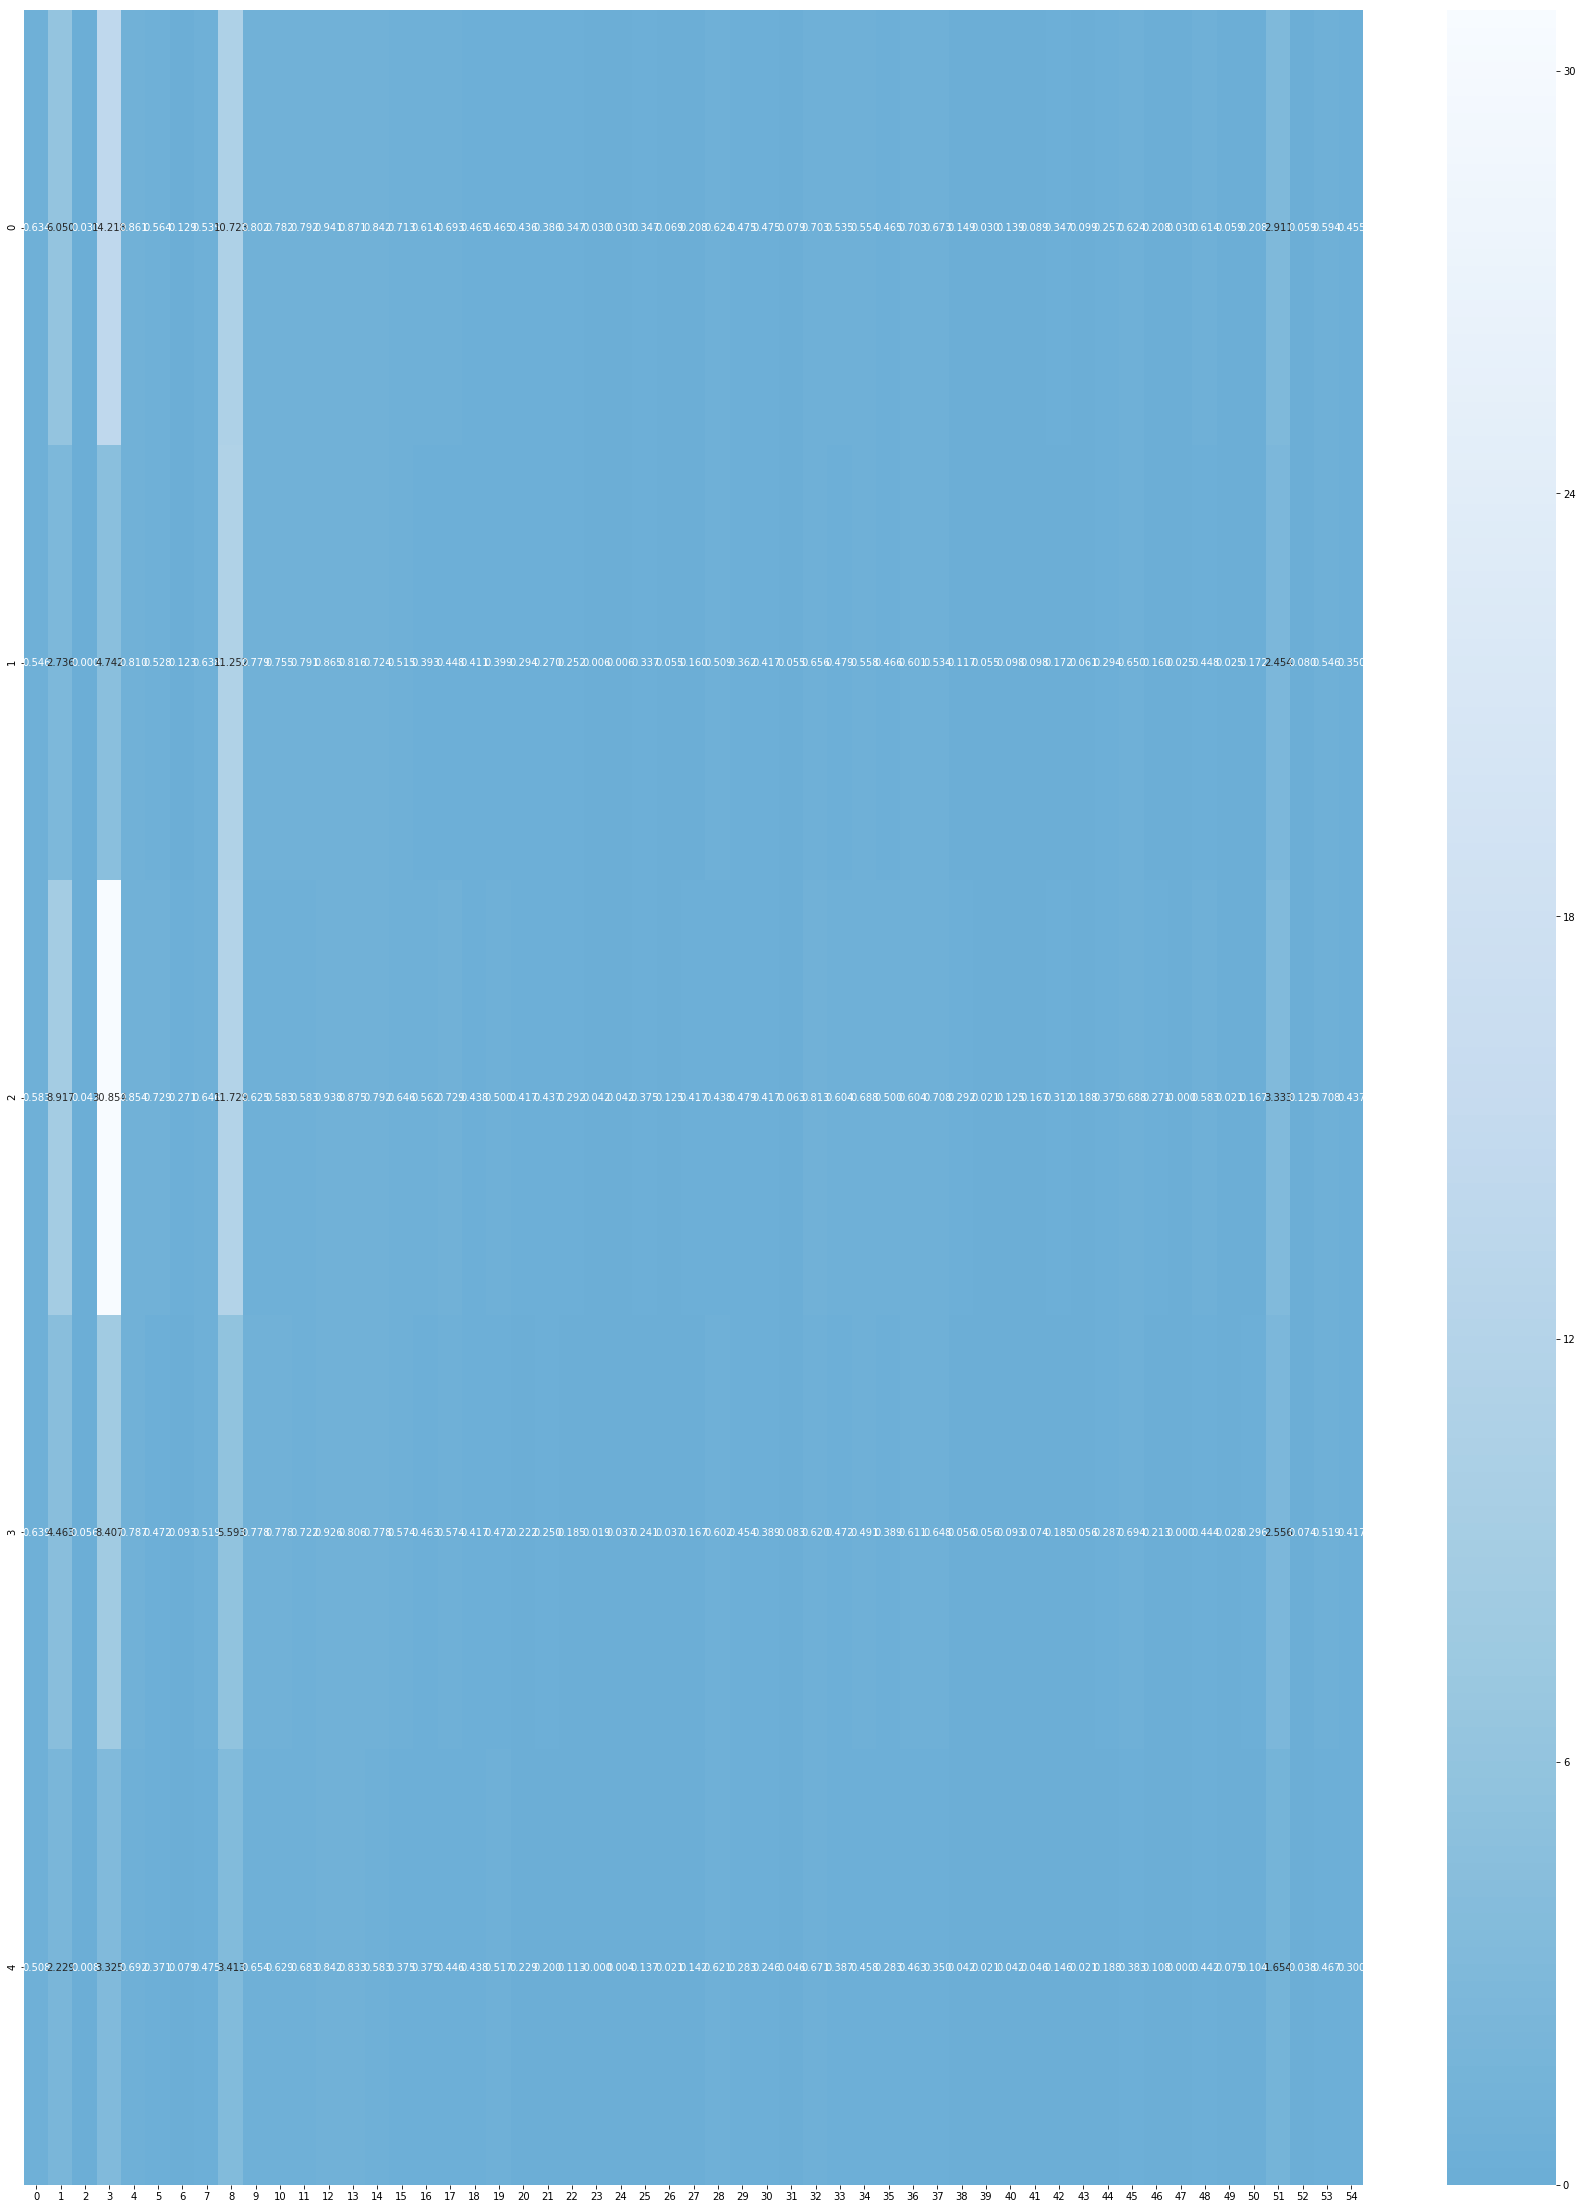

In [40]:
plt.figure(figsize=(30,40))
sns.heatmap(centro5, center=0, cmap='Blues_r', annot=True, fmt='.3f')   

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
cols=[ 'Tiene Estatutos',
       'Tiene sede', 'Suma Grupos poblacionales', 'Misión', 'Visión',
       'Objetivos', 'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de cooperación nacional',
       'Dispone de recursos recursos de cooperación internacional',
       'Dispone de recursos contratos con entidades públicas.',
       'Dispone de recursos campañas', 'Dispone de recursos eventos',
       'Recursos Propios', 'Proyectos con recursos propios',
       'Recursos Públicos', 'Recursos de Cooperación Internacional',
       'Manejo de registros de ingresos y gastos',
       'Existencia de Obligaciones tributarias',
       'Existencia de contador y revisor fiscal',
       'Relación con entidades privadas',
       'Relación con entidades públicas',
       'Ejecución de proyectos con otras entidades', 'MEDIOS: RADIO',
       'MEDIOS: CORREO ELECTRÓNICO', 'MEDIOS: TELEVISIÓN',
       'MEDIOS: PRENSA', 'MEDIOS: PERIODICOS_COMUNITARIOS',
       'MEDIOS: BLOGS', 'MEDIOS: PAGINAS_WEB', 'MEDIOS: FACEBOOK',
       'MEDIOS: YOUTUBE', 'MEDIOS: QQ', 'MEDIOS: WHATSAPPS',
       'MEDIOS: VOZ A VOZ', 'MEDIOS: INSTAGRAM', 'Suma Medios',
       'MEDIOS: TWITTER', 'Realiza rendición de cuentas',
       'Promover Control Social'] 
X=ORSO[cols]
y=ORSO['cluster5']
  

In [43]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 
  

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
import os

In [45]:
os.chdir('C:\\TREES')

In [46]:
data_clean = ORSO.dropna()
data_clean.columns.values

array(['Se encuentra avalada por institución', 'Suma Sector',
       'Emite certificaciones', 'Suma Areas temáticas', 'Tiene Estatutos',
       'Registro en Cámara de comercio', 'Certificado de gobernación',
       'Tiene sede', 'Suma Grupos poblacionales', 'Misión', 'Visión',
       'Objetivos', 'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de c

In [47]:
predictors = data_clean[['Se encuentra avalada por institución', 'Suma Sector',
       'Emite certificaciones', 'Suma Areas temáticas', 'Tiene Estatutos',
       'Registro en Cámara de comercio', 'Certificado de gobernación',
       'Tiene sede', 'Suma Grupos poblacionales', 'Misión', 'Visión',
       'Objetivos', 'Existencia de Organos de Dirección',
       'Está completo el organo de Dirección',
       'Instrumento de planeación Operativa',
       'Los planes de alinean a los instrumentos de planeación pública',
       'Los planes se articulan a las politicas públicas de la ciudad',
       'Participación activa en la formulación de planeación pública',
       'Disponer recursos económicos',
       'Dispone de recursos contribución de socios',
       'Dispone de recursos venta de servicos y productos',
       'Dispone de recursos donaciones',
       'Dispone de recursos recursos provenientes de entidades públicas (acciones de fortalecimiento, concursos, etc.)',
       'Dispone de recursos recursos de cooperación nacional',
       'Dispone de recursos recursos de cooperación internacional',
       'Dispone de recursos contratos con entidades públicas.',
       'Dispone de recursos campañas', 'Dispone de recursos eventos',
       'Recursos Propios', 'Proyectos con recursos propios',
       'Recursos Públicos', 'Recursos de Cooperación Internacional',
       'Manejo de registros de ingresos y gastos',
       'Existencia de Obligaciones tributarias',
       'Existencia de contador y revisor fiscal',
       'Relación con entidades privadas',
       'Relación con entidades públicas',
       'Ejecución de proyectos con otras entidades', 'MEDIOS: RADIO',
       'MEDIOS: CORREO ELECTRÓNICO', 'MEDIOS: TELEVISIÓN',
       'MEDIOS: PRENSA', 'MEDIOS: PERIODICOS_COMUNITARIOS',
       'MEDIOS: BLOGS', 'MEDIOS: PAGINAS_WEB', 'MEDIOS: FACEBOOK',
       'MEDIOS: YOUTUBE', 'MEDIOS: QQ', 'MEDIOS: WHATSAPPS',
       'MEDIOS: VOZ A VOZ', 'MEDIOS: INSTAGRAM', 'Suma Medios',
       'MEDIOS: TWITTER', 'Realiza rendición de cuentas',
       'Promover Control Social']]

targets = data_clean['cluster5']

In [48]:
predictors.dtypes

Se encuentra avalada por institución                                                                              int64
Suma Sector                                                                                                       int64
Emite certificaciones                                                                                             int64
Suma Areas temáticas                                                                                              int64
Tiene Estatutos                                                                                                   int64
Registro en Cámara de comercio                                                                                    int64
Certificado de gobernación                                                                                        int64
Tiene sede                                                                                                        int64
Suma Grupos poblacionales               

In [49]:
#Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 20%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3)

In [50]:
#Comprobamos el tamaño de las diferentes muestras (pred=predictora; tar=target, objetivo). La salida en cada caso es una pareja de datos: el tamaño de la muestra y el número de variables
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(198,)

In [51]:
#Construimos el árbol con los datos de entrenamiento
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [52]:
Peso=classifier.feature_importances_
dic={'importancia':Peso,'variable':predictors.columns}
wr=pd.DataFrame(dic,columns=['variable','importancia'])
wir=wr.sort_values(by='importancia', ascending=False)
wir

,variable,importancia
3,Suma Areas temáticas,0.612664
8,Suma Grupos poblacionales,0.345259
1,Suma Sector,0.012006
51,Suma Medios,0.009873
4,Tiene Estatutos,0.005316
49,MEDIOS: VOZ A VOZ,0.004320
16,Los planes se articulan a las politicas públic...,0.003840
0,Se encuentra avalada por institución,0.003840
39,MEDIOS: CORREO ELECTRÓNICO,0.001815
46,MEDIOS: YOUTUBE,0.001067


In [53]:
#wir.to_csv('example51.xlsx', index=False)

In [54]:
#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

In [55]:
#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[21,  3,  2,  5,  0],
       [ 2, 56,  0,  2,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0, 30,  3],
       [ 0,  1,  0,  4, 61]], dtype=int64)

In [56]:
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8888888888888888

In [57]:
#Para dibujar el árbol hay que importar otra serie de cosas
from sklearn import tree
from io import StringIO
from IPython.display import Image

In [58]:
#Pintamos el árbol
out = StringIO()
tree.export_graphviz(classifier, out_file='ArbolNuevoTV.dot')